# Modelo Média Móvel

Utilizando modelo autoregressivo para modelar a série temporal

Utilizaremos uma série temporal da temperatura na cidade australiana de Melbourne

* Importando biblitecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Lendo arquivo CSV

In [2]:
dados = pd.read_csv('daily-min-temperatures.csv')

Exibindo cinco primeiras linhas

In [3]:
dados.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


* Definindo data como índice

In [4]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados = dados.set_index('Date')

* Graficando série temporal

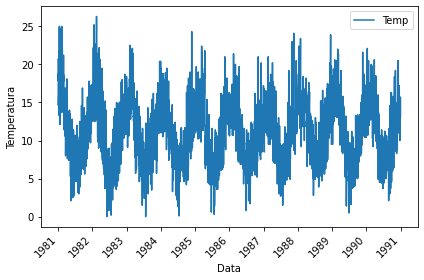

In [5]:
dados.plot()
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.tight_layout()

In [6]:
t_treino = dados[dados.index<'1990-01-01'].index
t_teste = dados[dados.index>='1990-01-01'].index
X_treino = dados[dados.index<'1990-01-01']
X_teste = dados[dados.index>='1990-01-01']

* Aplicando modelo média móvel

In [7]:
forecast = len(X_teste)

In [8]:
y_hat_avg = X_teste.copy()

In [9]:
y_hat_avg['predicao'] = 0

In [10]:
for i in range(forecast):
    y_hat_avg['predicao'].iloc[i] = X_treino['Temp'].rolling(i).mean().iloc[-1]

/home/usuario/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
y_hat_avg = y_hat_avg.dropna()

In [12]:
t_treino = t_treino.values
X_treino = X_treino.values
t_teste = t_teste.values
X_teste = X_teste.values
X_pred = y_hat_avg.values

* Graficando

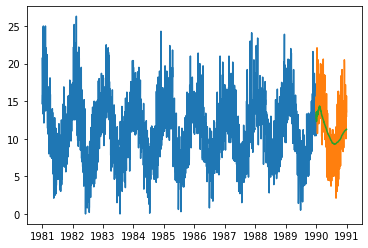

In [13]:
plt.plot(t_treino,X_treino)
plt.plot(t_teste,X_teste)
plt.plot(t_teste[1:],y_hat_avg['predicao'])

* Calculando erros

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
MSE = mean_squared_error(X_teste[1:],y_hat_avg['predicao'])

In [16]:
RMSE = np.sqrt(MSE)

In [17]:
print("RMSE = {:0.2f}".format(RMSE))

RMSE = 3.09
